In [1]:
import pandas as pd
from datetime import datetime as dt
import pickle as pkl
import refine_data as rd
from matplotlib import pyplot as plt
import numpy as np
import math
from sklearn import preprocessing
import seaborn as sns

# 1. 순수 키스트로크 데이터

### 1) pause 데이터

In [2]:
# pyqt data 불러와

with open('/Users/kintch/Downloads/default_1607743041.0855079/default_pyqt_2020_12_12_12_23.pkl', 'rb') as f:  # cv.pkl이라는 파일을 바이너리 읽기(rb)모드로 열어서 f라 하고
    pyqt_data = pkl.load(f)    
    
# pynput data 불러와    
with open('/Users/kintch/Downloads/default_1607743041.0855079/default_pynput_2020_12_12_12_23.pkl', 'rb') as f:  # cv.pkl이라는 파일을 바이너리 읽기(rb)모드로 열어서 f라 하고
    pynput_data = pkl.load(f)

# pynput data를 활용하여 time data를 refine한다.
refined_data = rd.refine_all_data(pyqt_data, pynput_data)

long press
long press
long press
long press
long press
long press
long press
long press
long press
long press
long press
long press
long press
long press
long press
long press
long press
long press
long press
long press
long press
long press
long press
long press
long press
long press
long press
long press
long press
long press
long press
long press
long press
long press
long press
long press
long press
long press
long press
long press
long press
long press
long press
long press
long press
long press
long press
long press
long press
long press
long press
long press
long press
long press
long press
long press
long press
long press
long press
long press
long press
long press
long press
long press
long press
long press
long press
long press
long press
long press
long press
long press
long press
long press
long press
long press
long press
long press
long press
long press
long press
long press
long press
long press
long press
long press
long press
long press
long press
long press
long press

In [21]:
# 일단 저장한다

pd.DataFrame(refined_data).to_csv('/Users/kintch/Downloads/201215_2.csv')

In [519]:
#dbe.to_csv('/Users/kintch/Downloads/jitae1.csv')

In [3]:
# pandas 데이터 프레임으로 만들자

dbe = pd.DataFrame(refined_data)

# 컬럼 명 추가
dbe.columns = ['none', 'key', 'key_bind', 'whole_text', 'press_time', 'insert_loc', 'realease_time'] 

In [4]:
dbe.head()

,none,key,key_bind,whole_text,press_time,insert_loc,realease_time
0,1,Key.shift_r,,,1.607743e+09,0,1.60774e+09
1,1,Key.shift_r,,,1.607743e+09,0,1.60774e+09
2,1,-,45,-,1.607743e+09,1,1.60774e+09
3,1,ㅎ,,-ㅎ,1.607743e+09,1,1.60774e+09
4,1,ㅏ,,-하,1.607743e+09,1,1.60774e+09


In [5]:
#결측치 확인
dbe.isnull().sum()

none             0
key              0
key_bind         0
whole_text       0
press_time       0
insert_loc       0
realease_time    0
dtype: int64

In [6]:
# 데이터 추가 정제 (오류 수정을 위한(20.08.24))

#중복된 전/후 행 중 후행이 whole_text는 맞음
y = [x for x in dbe[(dbe.key == 'Key.space') & (dbe.key_bind =="")].index]

for x in y:
    dbe.whole_text.loc[x] = dbe.whole_text.loc[x+1]
    
#스페이스 바인딩 에러 행 삭제    
dbe.whole_text[(dbe.key == 'Key.space') & (dbe.key_bind =="")]
space_binding_error = dbe[(dbe.key == 'Key.space') & (dbe.key_bind ==32)].index

dbe.drop(space_binding_error, inplace=True) #없애버려.



/Users/kintch/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [8]:
#dbe[0:20]

In [9]:
#시작시점 시간 재계산
#피험자마다 window데이터
with open('/Users/kintch/Downloads/default_1607743041.0855079/default_windows_name_2020_12_12_12_23.pkl', 'rb') as f:  # cv.pkl이라는 파일을 바이너리 읽기(rb)모드로 열어서 f라 하고
    starttime_data = pkl.load(f)      # f의 내용을 불러와 new_cv라고 함
starttime_data[0][0]
#시작시간을 datetime으로 utc 변환
starttime_dt=dt.utcfromtimestamp(starttime_data[0][0])
starttime_dt

datetime.datetime(2020, 12, 12, 3, 17, 21, 120272)

In [10]:
starttime_data

[[1607743041.1202717, 'Kologger'],
 [1607743041.4293919, 'Kologger'],
 [1607743041.7443635, 'Kologger'],
 [1607743042.0554175, 'Kologger'],
 [1607743042.368522, 'Kologger'],
 [1607743042.6700447, 'Kologger'],
 [1607743042.9822192, 'Kologger'],
 [1607743043.2935028, 'Kologger'],
 [1607743043.6031156, 'Kologger'],
 [1607743043.914118, 'Kologger'],
 [1607743044.2285085, 'Kologger'],
 [1607743044.5433369, 'Kologger'],
 [1607743044.8579545, 'Kologger'],
 [1607743045.159204, 'Kologger'],
 [1607743045.4618106, 'Kologger'],
 [1607743045.7642016, 'Kologger'],
 [1607743046.0792649, 'Kologger'],
 [1607743046.394018, 'Kologger'],
 [1607743046.705226, 'Kologger'],
 [1607743047.019098, 'Kologger'],
 [1607743047.3312185, 'Kologger'],
 [1607743047.6440468, 'Kologger'],
 [1607743047.955437, 'Kologger'],
 [1607743048.2675724, 'Kologger'],
 [1607743048.5828178, 'Kologger'],
 [1607743048.8959615, 'Kologger'],
 [1607743049.207943, 'Kologger'],
 [1607743049.5200548, 'Kologger'],
 [1607743049.8338642, 'Kolog

In [11]:
# 데이터 오류? 순서대로 align한 번 해주는거지모

alignd_press_time=dbe.press_time.sort_values()
alignd_press_time.index = dbe.index
dbe['press_time']=alignd_press_time

In [12]:
# unix time을 utc time format으로 바꾸자

dbe_press_unix=dbe.press_time.tolist()
dbe_press_dt = [dt.utcfromtimestamp(ts) for ts in dbe_press_unix]
dbe['press_time_dt']=dbe_press_dt

#utc time format으로된 pause time 리스트를 만들자 
#사실 utc로 바꾸건 unix로 하건 사이시간은 똑같짘ㅋㅋ모했냐
n=0
pause_time=[]
while n < len(dbe_press_dt)-1: 
    x = dbe_press_dt[n+1] - dbe_press_dt[n]
    pause_time.append(x.seconds+x.microseconds * 0.000001) # 초 단위로 pause 데이터 생성
    n+=1

pause_time.insert(0,0) # 처음에 0하나 끼워넣어줘야 데이터 길이가 맞음

In [13]:
dbe['pause_time'] = pause_time

In [14]:
dbe['pause_time_log'] = preprocessing.scale(np.log(dbe['pause_time']+1)) # 로그

In [15]:
dbe.head()

,none,key,key_bind,whole_text,press_time,insert_loc,realease_time,press_time_dt,pause_time,pause_time_log
0,1,Key.shift_r,,,1.607743e+09,0,1.60774e+09,2020-12-12 03:17:23.763515,0.000000,-0.624692
1,1,Key.shift_r,,,1.607743e+09,0,1.60774e+09,2020-12-12 03:17:25.386811,1.623296,2.654564
2,1,-,45,-,1.607743e+09,1,1.60774e+09,2020-12-12 03:18:29.537077,64.150266,13.576891
3,1,ㅎ,,-ㅎ,1.607743e+09,1,1.60774e+09,2020-12-12 03:18:29.562704,0.025627,-0.538653
4,1,ㅏ,,-하,1.607743e+09,1,1.60774e+09,2020-12-12 03:18:29.675196,0.112492,-0.262223


In [16]:
#이상치 확인(outlier)
#
dbe[dbe.pause_time > 10000]
#dbe.whole_text[dbe.pause_time > 70000].tolist()

,none,key,key_bind,whole_text,press_time,insert_loc,realease_time,press_time_dt,pause_time,pause_time_log


In [17]:
# 시작 시간(t=0)으로부터 n초 뒤에 눌린 키
# dbe_press_dt는 전체 눌린 시간을 utc시간으로 나타낸 것

n=0
press_time_start_at_zero=[]
while n < len(dbe_press_dt): 
    x = dbe_press_dt[n] - starttime_dt
    press_time_start_at_zero.append(x.seconds+x.microseconds * 0.000001) # 초 단위로 pause 데이터 생성
    n+=1
#press_time_start_at_zero

dbe['press_time_from_zero']=press_time_start_at_zero

In [18]:
dbe[0:5]

,none,key,key_bind,whole_text,press_time,insert_loc,realease_time,press_time_dt,pause_time,pause_time_log,press_time_from_zero
0,1,Key.shift_r,,,1.607743e+09,0,1.60774e+09,2020-12-12 03:17:23.763515,0.000000,-0.624692,2.643243
1,1,Key.shift_r,,,1.607743e+09,0,1.60774e+09,2020-12-12 03:17:25.386811,1.623296,2.654564,4.266539
2,1,-,45,-,1.607743e+09,1,1.60774e+09,2020-12-12 03:18:29.537077,64.150266,13.576891,68.416805
3,1,ㅎ,,-ㅎ,1.607743e+09,1,1.60774e+09,2020-12-12 03:18:29.562704,0.025627,-0.538653,68.442432
4,1,ㅏ,,-하,1.607743e+09,1,1.60774e+09,2020-12-12 03:18:29.675196,0.112492,-0.262223,68.554924


In [19]:
dbe.to_csv('/Users/kintch/Downloads/201215_3.csv')

### 2) burst 데이터

# 2. 윈도우 활성창 데이터

### 1) kologger 활성 상태(source=7)에서의 pause데이터 추출 과정


#### (1) kologger 활성상태 일 때 time 확인

In [49]:
#윈도우 활성창 데이터

pynput_data = list()
pyqt_data = list()
mouse_data = list()
window_name_data = list()

with open('/Users/kintch/Downloads/analized_window_title.pkl', 'rb') as f:  # cv.pkl이라는 파일을 바이너리 읽기(rb)모드로 열어서 f라 하고
    window_name_data = pkl.load(f)      # f의 내용을 불러와 new_cv라고 함

In [50]:
# window_name_data의 {0번째 row } 데이터 주인?
for x in window_name_data:
    print(x[0])

./windospkl/dbe05156@naver.com_windows_name_2020_8_13_17_50 - 손민수.pkl
./windospkl/default_windows_name_2020_8_18_20_33 - 정수현.pkl
./windospkl/default_windows_name_2020_8_15_23_36 - 가정T곰토끼.pkl
./windospkl/default_windows_name_2020_8_18_17_49 - Soyoung Kim.pkl
./windospkl/default_windows_name_2020_8_18_14_41 - 아니요.pkl


In [65]:
window_name_data[3][0]

'./windospkl/default_windows_name_2020_8_18_17_49 - Soyoung Kim.pkl'

In [64]:
##번호 수정해야함(사람마다)

# window_name_data의 {n번째 row }X {1번째 column }불러오기
df_all = pd.DataFrame(window_name_data[3][1]) #[n][1]

# 컬럼 명 추가
df_all.columns = ['source', 'time', 'tstamp'] 

df_all.head()

,source,time,tstamp
0,7,7.533208,"[[1597735902.160786, 7], [1597735902.3117075, ..."
1,7,146.244282,"[[1597735919.3447866, 7], [1597735919.4952848,..."
2,0,367.728862,"[[1597736065.7399282, 0], [1597736065.8907788,..."
3,7,48.813709,"[[1597736433.6193924, 7], [1597736433.7701738,..."
4,5,2.110285,"[[1597736482.5849009, 5], [1597736482.7357254,..."


In [66]:
# kologer 편집기에서 머문 시간 튜플 (x,y) ---->(x초 ~ y초) :kolog_fromtos

kolog_fromto = df_all[df_all.source ==6].tstamp.tolist()
n=0
kolog_fromtos=[]
while n <len(kolog_fromto):
    kolog_fromtos.append((kolog_fromto[n][0][0], kolog_fromto[n][-1][0]))
    n+=1
kolog_fromtos[0:5]

[(1597736488.306497, 1597736495.0921912),
 (1597736518.8548803, 1597736533.7900176),
 (1597736591.3950012, 1597736604.6516676),
 (1597736607.369596, 1597736617.7725453),
 (1597736619.7322366, 1597736653.0488956)]

In [67]:
starttime_data[0][0]

1597735893.2438352

In [68]:
#시작점으로부터의 시간은 x-dbe.press_time[0]으로 계산함.#아 이게 오류네;;(수정함)
#starttime_data[0][0] 얘임;

kolog_fromtos_from_zero=[]
for (x,y) in kolog_fromtos:
    kolog_fromtos_from_zero.append((x-starttime_data[0][0],y-starttime_data[0][0]))
kolog_fromtos_from_zero[0:5]

[(595.0626618862152, 601.8483560085297),
 (625.6110451221466, 640.5461823940277),
 (698.1511659622192, 711.4078323841095),
 (714.1257607936859, 724.5287101268768),
 (726.4884014129639, 759.8050603866577)]

#### (2) kologger에서 멈춘시간만 뽑아줘 (window 활성창 데이터+ pause 데이터)

In [69]:
#source7(kologger)에서 누른시간(source7_press_t)/ 멈춤시간(source7_pause)

source7_pause=[]
source7_press_t=[]
for (x,y) in kolog_fromtos:
    a=[]
    b=[]
    for z in dbe.press_time.tolist():
        if (x <= z <= y) is True:
            j = (dbe.pause_time[dbe.press_time == z]).tolist()[0]
            if j >=2: #2초 이상만 유의미한 pause로 봐서 얘내들만 추려줘
                a.append(j)   #z대신 dbe.pause_time[dbe.press_time == z]
                b.append(z)
    source7_pause.append(a)
    source7_press_t.append(b)

In [71]:
source7_press_t[0:5]

[[],
 [],
 [1597736593.5344357, 1597736600.881933],
 [1597736608.128591],
 [1597736620.5326157,
  1597736631.4768248,
  1597736640.3986998,
  1597736645.0989094]]

In [72]:
source7_pause[0:5]

[[],
 [],
 [61.516017, 2.324404],
 [6.59006],
 [5.357095, 6.308988, 2.112107, 2.03733]]

## 3. 그래프 그리기(시각화)

In [73]:
#다른 자료 보다가 kologger로 와서 본 처음 pause는 따로 빼자 인간적으로(얘는 나중에))

#enterance pause 빼보자
source7_pause_flat_start=[]
for x in source7_pause:
    try:
        source7_pause_flat_start.append(x[0])
    except:
        pass
#source7_pause_flat_start

#enterance press 빼보자(source7_press_t_flat_start)
source7_press_t_flat_start=[]
for x in source7_press_t:
    try:
        source7_press_t_flat_start.append(x[0])
    except:
        pass
#source7_press_t_flat_start

In [74]:
#flatten 하게 만든 pause 리스트 & press time 리스트 
source7_pause_flat=sum(source7_pause, [])
source7_press_t_flat=sum(source7_press_t, [])

In [75]:
#0이 원점으로 시작하는 press값(source7_press_t_flat_satzero, source7_press_t_flat_start_satzero)
source7_press_t_flat_satzero = [x-starttime_data[0][0] for x in source7_press_t_flat]
source7_press_t_flat_start_satzero = [x-starttime_data[0][0] for x in source7_press_t_flat_start]

In [77]:
#source7_pause_flat

In [78]:
#source7_press_t_flat_satzero

In [79]:
#source7_press_t_flat_start_satzero

In [80]:
#dbe[0:20]

In [57]:
dbe.to_csv('/Users/kintch/Downloads/jit1.csv')

In [89]:
from pprint import pprint

In [90]:
# pause 위치들에서 전체 텍스트(whole_text) 톺아보기
y=[]
for x in source7_press_t_flat:
    y.append(str(dbe.press_time_from_zero[dbe.press_time == x].tolist()[0])+str(dbe.whole_text[dbe.press_time == x].tolist()[0]))
pprint(y)

['700.290601바른 성문화를 위한 국민 연합\n\n-',
 '707.638098바른 성문화를 위한 국민 연합\n\n-부모의 잘못된 성역 모델읠 영향,',
 '714.884756바른 성문화를 위한 국민 연합\n\n-부모의 잘못된 성역 모델읠 영향, ㅇ',
 '727.288781바른 성문화를 위한 국민 연합\n\n-부모의 잘못된 성역 모델읠 영향, 유년기의 불안정한 성정체성,',
 '738.23299바른 성문화를 위한 국민 연합\n\n-부모의 잘못된 성역 모델읠 영향, 유년기의 불안정한 성정체성, 잘못된 성경험, ㄷ',
 '747.154865바른 성문화를 위한 국민 연합\n'
 '\n'
 '-부모의 잘못된 성역 모델읠 영향, 유년기의 불안정한 성정체성, 잘못된 성경험, 동성애를 우호적으로 표현하는 미디어의 영향, ㄷ',
 '751.855074바른 성문화를 위한 국민 연합\n'
 '\n'
 '-부모의 잘못된 성역 모델읠 영향, 유년기의 불안정한 성정체성, 잘못된 성경험, 동성애를 우호적으로 표현하는 미디어의 영향, 동성애를 '
 '묘사하는',
 '762.014298바른 성문화를 위한 국민 연합\n'
 '\n'
 '-부모의 잘못된 성역 모델읠 영향, 유년기의 불안정한 성정체성, 잘못된 성경험, 동성애를 우호적으로 표현하는 미디어의 영향, 동성애를 '
 '인정하는 사회 풍토\n',
 '775.299768바른 성문화를 위한 국민 연합\n'
 '\n'
 '-부모의 잘못된 성역 모델읠 영향, 유년기의 불안정한 성정체성, 잘못된 성경험, 동성애를 우호적으로 표현하는 미디어의 영향, 동성애를 '
 '인정하는 사회 풍토,\n'
 'ㅅ\n',
 '791.888334바른 성문화를 위한 국민 연합\n'
 '\n'
 '-부모의 잘못된 성역 모델읠 영향, 유년기의 불안정한 성정체성, 잘못된 성경험, 동성애를 우호적으로 표현하는 미디어의 영향, 동성애를 '
 '인정하는 사회 풍토,\n'
 '신체적인 요소,\n',
 '794.834974바른 성문화를 위한 국민 연합\n'
 '\n'
 

 '-HIV 감염은 관리 가능한 만성질환디ㅏ.\n'
 '\n'
 "바른 성문화를 위한 국민연합(이하 '바성연'이라고 하겠음. 과 한국 성소수자 연구회(이하'한성연'이라고 하겠음)는 각각 에이즈에 대하여 "
 '다른 입장을 표명하고 있다. 간단히 말하면 바성연에서는 동성애는 선천적인 것도 아니고, 비정상적이며 에이즈와 밀접한 연관이 있다고 '
 '주장하며, 한성연에서는 동성애는 이미 정신질환 목록에서 제외되었으며 질병이 아니므로 치료해야할 필요성도 없고 동성애가 가장 큰 에이즈의 '
 '원인이 아니라고 주장한다. \n'
 '먼저 바성연에서 주장하는 내용을 보면 동성애에서 행해지는 비정상적인 성교를 통해 에이즈의 감염이 더욱 높아진다고 주장한다. 동성애는 '
 '유전적인 특질이 아니며 부모로부터 물려받은 것도 아니고 중독성이 심한 성적지향에 빠져 그것이 선천적인 것처럼 느낀다는 것이다. 특히 '
 '남성간의 성교는 항문을 통해 이뤄지는데 남녀의 정상적인 성교보다 각종 질병과 유발할 수 있는 비위생적이고 비정상적인 행위라는 것이다. '
 '특히 에이즈의 환자 중에 92프로는 남성이고 그 중 43프로가 동성애에 의해 감염퇴고 특히 청소년 동성애자가 더욱 감염 위험이 높은  ',
 '2941.659777바른 성문화를 위한 국민 연합\n'
 '\n'
 '-부모의 잘못된 성역 모델읠 영향, 유년기의 불안정한 성정체성, 잘못된 성경험, 동성애를 우호적으로 표현하는 미디어의 영향, 동성애를 '
 '인정하는 사회 풍토,\n'
 '신체적인 요소, 성적 쾌감과 강한 중독성\n'
 '-강제성을 뜻하지 않음. 본능이나 경향을 억제할 수 있는 충분한 의지와 절제력\n'
 '-유전, 선천적, 치유 불가능 아님\n'
 '-자녀를 적게 낳은 행동이 유전적일 수 없다. 갑자기 나타났다가 갑자기 사라짐. 나이가 많아질수록 감소, 도시와 시골의 차이\n'
 '-태어날 때부터 다른 주뇌를 가지지 않았음.남성 동성애자와 여성의 두뇌가 비슷하다는 주장 거짓. 어떤 성적지향에 깊이 빠지면 선천적인 '
 

 '3624.617141바른 성문화를 위한 국민 연합\n'
 '\n'
 '-부모의 잘못된 성역 모델읠 영향, 유년기의 불안정한 성정체성, 잘못된 성경험, 동성애를 우호적으로 표현하는 미디어의 영향, 동성애를 '
 '인정하는 사회 풍토,\n'
 '신체적인 요소, 성적 쾌감과 강한 중독성\n'
 '-강제성을 뜻하지 않음. 본능이나 경향을 억제할 수 있는 충분한 의지와 절제력\n'
 '-유전, 선천적, 치유 불가능 아님\n'
 '-자녀를 적게 낳은 행동이 유전적일 수 없다. 갑자기 나타났다가 갑자기 사라짐. 나이가 많아질수록 감소, 도시와 시골의 차이\n'
 '-태어날 때부터 다른 주뇌를 가지지 않았음.남성 동성애자와 여성의 두뇌가 비슷하다는 주장 거짓. 어떤 성적지향에 깊이 빠지면 선천적인 '
 '것처럼 느껴짐.(오랫동안 훈련한 까닭), 쌍둥이의 동성애 일치율 낮음.\n'
 '-동성애에서 이성애로 바뀔 가능성 30~50, \n'
 '-선천적 주장: 어쩔수 없는 몸, 동성애 끊으려고 했으나 실패, 동성애자학자들의 노력\n'
 '-동성애는 비정상적: 남녀의 성기관, 정자와 난자가 만나 후손의 탄생, 자연의 섭리,항문 성교로 인한 수많은 질병\n'
 '-에이즈와의 밀접한 관계: 92프로 남성 환자, 43프로 동성애 감염. 청소년 동성애자가 더 감염 위험 높음\n'
 '-동성애자 불행하다.: 1년 이내 헤어짐, 에이즈. 나이들수록 외로워짐. 자살시도 수명이 짧음.\n'
 '\n'
 '한국성소수자연구회\n'
 '-동성애가 정신질환 목록에서 제외된 지 40년이 지남: 판단력, 안정성, 신뢰성, 직업 능력에 결함이 있음 의미하지 않음.\n'
 '-자아 이질적 성적지향\n'
 '-성적 지향은 선택하는 것이 아니다.: 아동기 초기에 형성된다.\n'
 '-동성애 전환 치료는 존재하지 않는다: 질병이 아니다. 성적지향을 억지로 바꾸려는 치료는 치료 대상자의 우울, 불안, 자살시도 등을 '
 '증가시킴\n'
 '-조작된 낙인과 공포\n'
 '첫 환자 보고 : 동성애 아닌 인간 면역 결

In [91]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import cufflinks as cf
cf.go_offline(connected=True)

In [765]:
widgets.IntSlider?

In [94]:
len(source7_press_t_flat_satzero)

163

In [92]:
pause_ttime=[dbe.press_time_from_zero[dbe.press_time == x].tolist()[0] for x in source7_press_t_flat]
pause_whole_text=[dbe.whole_text[dbe.press_time == x].tolist()[0] for x in source7_press_t_flat]

In [826]:
pause_ttime[2]

564.356312

In [96]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    print(pause_ttime[x])
    fig = plt.figure(figsize= (12, 3))
    cha2 = fig.add_subplot(1,1,1) # 하나로 하려면 fig2(x) fig 로
    cha2.plot(source7_press_t_flat_satzero[0:x+1], source7_pause_flat[:x+1], color='g')  # 선 그래프
    cha2.scatter(source7_press_t_flat_satzero[0:x+1], source7_pause_flat[:x+1], color='g', label='pause')  # 선 그래프
    cha2.scatter(source7_press_t_flat_start_satzero[0:], source7_pause_flat_start[0:], color='r', label='enterance pause(Kologger)')  # 선 그래프
    cha2.set_ylim(0,250)
    cha2.set_xlim(0,5000)
    plt.axvspan(788.097124, 1217.905117, alpha=200, facecolor='yellow')
    plt.axvspan(1440.577055, 1783.427682, alpha=200, facecolor='gray')
    plt.axvspan(1993.972288, 2499.722494, alpha=200, facecolor='skyblue')
    plt.axvspan(2534.736776, 3141.582882, alpha=200, facecolor='red')    
    plt.axvspan(3621.516904, 4497.454533, alpha=200, facecolor='green')
    plt.show()
    print(pause_whole_text[x])
    
interactive_plot = interactive(f, x=(0, 162, 1))
interactive_plot

interactive(children=(IntSlider(value=81, description='x', max=162), Output()), _dom_classes=('widget-interact…

In [854]:
#http로 저장
from ipywidgets.embed import embed_minimal_html
embed_minimal_html('/Users/kintch/Downloads/export.html', views=[interactive_plot], title='Widgets export')

In [81]:
#재계산
df_all['from_to_time']= [(x[0][0]-starttime_data[0][0], x[-1][0]-starttime_data[0][0]) for x in df_all.tstamp.tolist()]

In [82]:
df_all.head()

,source,time,tstamp,from_to_time
0,7,7.533208,"[[1597735902.160786, 7], [1597735902.3117075, ...","(8.916950702667236, 16.450158834457397)"
1,7,146.244282,"[[1597735919.3447866, 7], [1597735919.4952848,...","(26.100951433181763, 172.345232963562)"
2,0,367.728862,"[[1597736065.7399282, 0], [1597736065.8907788,...","(172.49609303474426, 540.2249546051025)"
3,7,48.813709,"[[1597736433.6193924, 7], [1597736433.7701738,...","(540.3755571842194, 589.1892666816711)"
4,5,2.110285,"[[1597736482.5849009, 5], [1597736482.7357254,...","(589.3410656452179, 591.4513502120972)"


In [83]:
# 출처1 - 시작시간
# 출처1 - 끝시간
# ... 이런 식으로 데이터 바꿔줌

x_=[]
for (x,y) in df_all.from_to_time.tolist():
    x_.append(x)
    x_.append(y)
y_=[]
for x in df_all.source.tolist():
    y_.append(x)
    y_.append(x)

In [369]:
##친구야, 이러면 중간에 다른 출처가 끼어들어가서 시간이 바뀌어.
#나가리

#source(출처 자료), 각각에서 머문 시간 리스트
#a= df_all.source.tolist()
#b= df_all.time.tolist()

#누적시간 time_acc 계산 #개별 source에서 시간 / 시간 비율계산할라고
#n=0
#acc=0
#time_acc=[] 
#while n <len(b):
#    acc=acc+b[n]
#    time_acc.append(acc)
#    n+=1
#time_acc.insert(0, 0)
#source 자료 맨 마지막에. 동일한 데이터 추가.
#a.append(a[len(a)-1])

/Users/kintch/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



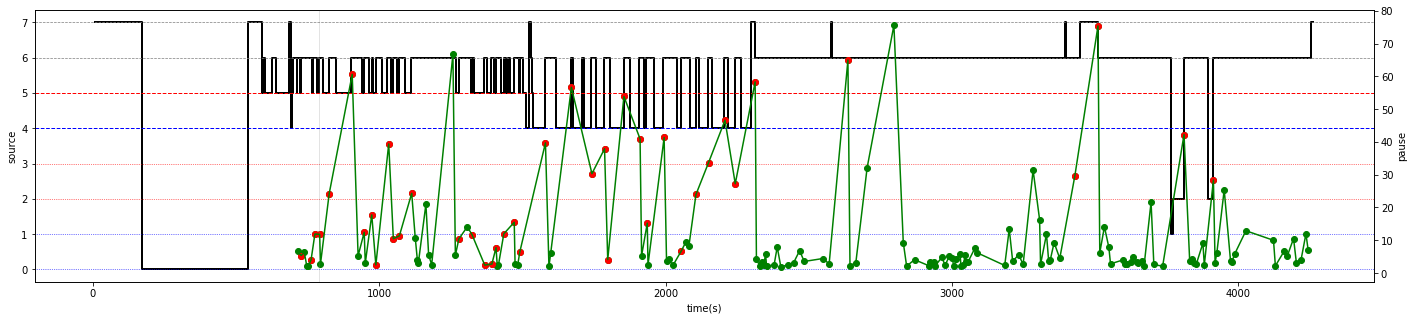

In [102]:
##그래프 그리기

#help(plt.figure)
fig = plt.figure(figsize= (24, 5))
#fig2 = plt.figure(figsize= (12, 5)) #  그래프 각각으로 하려면

cha1 = fig.add_subplot(1,1,1)
cha2 = fig.add_subplot(1,1,1) # 하나로 하려면 fig2(x) fig 로
cha2 = cha1.twinx() # 그래프 하나로 하려면 없애


#data1 = np.random.randn(50)
#data2 = np.random.randn(50).cumsum()  # cumsum() : Cumulative Sum 누적합
#x = np.array(time_acc) # 누적 시간 활용
#y = np.array(a)

# chart라는 같은 차트 공간에 두 데이터를 집어 넣음 -> 같이 나타남
cha1.plot(x_, y_, color='k', drawstyle='steps-post', linewidth=2)  # 계단형 그래프 # label='step',
cha2.plot(source7_press_t_flat_satzero[2:], source7_pause_flat[2:], color='g')  # 선 그래프
cha2.scatter(source7_press_t_flat_satzero[2:], source7_pause_flat[2:], color='g', label='pause')  # 선 그래프
cha2.scatter(source7_press_t_flat_start_satzero[2:], source7_pause_flat_start[2:], color='r', label='enterance pause(Kologger)')  # 선 그래프

#가로선 그리기
cha1.axhline(y=0, color='b', linestyle=':', linewidth=0.7)
cha1.axhline(y=1, color='b', linestyle=':', linewidth=0.7)
cha1.axhline(y=2, color='r', linestyle=':', linewidth=0.7)
cha1.axhline(y=3, color='r', linestyle=':', linewidth=0.7)
cha1.axhline(y=4, color='b', linestyle='--', linewidth=1)
cha1.axhline(y=5, color='r', linestyle='--', linewidth=1)
cha1.axhline(y=6, color='tab:gray', linestyle='--', linewidth=0.7)
cha1.axhline(y=7, color='tab:gray', linestyle='--', linewidth=0.7)

#세로선 그리기
#cha2.axvline(x=1848.53, color='orange', linestyle='-', linewidth=1)
#cha2.axvline(x=2003.76, color='b', linestyle='-', linewidth=1)
#cha2.axvline(x=2246.67, color='gold', linestyle='-', linewidth=1)


#영역 색칠하기
#plt.axvspan(788.097124, 1217.905117, alpha=200, facecolor='yellow')
#plt.axvspan(1440.577055, 1783.427682, alpha=200, facecolor='gray')
#plt.axvspan(1993.972288, 2499.722494, alpha=200, facecolor='skyblue')
#plt.axvspan(2534.736776, 3141.582882, alpha=200, facecolor='red')    
#plt.axvspan(3621.516904, 4497.454533, alpha=200, facecolor='green')

#x축 자르기
#cha1.set_xlim(0,250)
#cha1.set_xlim(1500,2300)


#물결선 그리기(매우 원시적임. 그래프 똑같은 거 두 개 그리고 잘라서 붙이는 식) #https://stackoverflow.com/questions/32185411/break-in-x-axis-of-matplotlib
# hide the spines between ax and ax2
#cha1.spines['right'].set_visible(False)
#cha1.spines['left'].set_visible(False)
#ax.yaxis.tick_left()
#ax.tick_params(labelright='off')
#ax2.yaxis.tick_right()

plt.axvspan(788.097124, 793.430551, alpha=200, facecolor='gray')
#물결선 길이 조정
#d = .005 # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
#kwargs = dict(transform=cha1.transAxes, color='k', clip_on=False)
#cha1.plot((1-d,1+d), (-d,+d), **kwargs)
#cha1.plot((1-d,1+d),(1-d,1+d), **kwargs)

#kwargs.update(transform=cha1.transAxes)  # switch to the bottom axes
#cha1.plot((-d,+d), (1-d,1+d), **kwargs)
#cha1.plot((-d,+d), (-d,+d), **kwargs)


# 차트 구성요소 추가
#plt.title("계단형과 선 그래프") # 제목
#cha1.set_ylim(0, 8)
#cha2.set_ylim(0, 50)
cha1.set_xlabel("time(s)") # x축 이름
cha1.set_ylabel("source") # y축 이름
cha2.set_xlabel("time(s)") # x축 이름
cha2.set_ylabel("pause") # y축 이름
fig2.legend(loc='upper right') # 범례

In [103]:
fig.savefig('/Users/kintch/Downloads/fig0_jit_all.png', dpi=1000)

In [87]:
fig2.savefig('/Users/kintch/Downloads/fig2_jit_pause.png', dpi=1000)

2) Real Graph그리기 

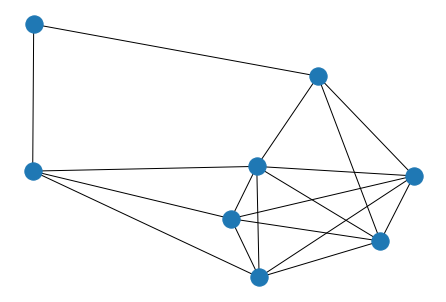

In [279]:
import networkx as nx
G=nx.from_numpy_array(window_name_data[0][2])
nx.draw(G)

In [278]:
window_name_data[0][2]

array([[0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 1., 0., 0., 0.],
       [0., 0., 0., 4., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 1., 2., 1.],
       [0., 0., 1., 0., 0., 2., 4., 0.],
       [0., 1., 1., 0., 0., 0., 3., 0.],
       [0., 0., 2., 1., 4., 2., 0., 3.],
       [1., 0., 0., 0., 1., 0., 1., 0.]])

In [275]:
#0번째 사람 
# window_name_data의 {0번째 row }X {1번째 column }불러오기
df_all = pd.DataFrame(window_name_data[0][2])

,0,1,2
0,6,11.992937,"[[1597306376.0466182, 6], [1597306376.2032006,..."
1,7,37.370099,"[[1597306388.4843776, 7], [1597306388.6379554,..."
2,4,13.927782,"[[1597306431.5512478, 4], [1597306431.7018456,..."
3,5,13.714930,"[[1597306445.6356018, 5], [1597306445.7861989,..."
4,2,9.205972,"[[1597306459.5071104, 2], [1597306459.657708, ..."
5,3,7.294506,"[[1597306468.9115524, 3], [1597306469.0641463,..."
6,7,13.538812,"[[1597306476.5710783, 7], [1597306476.7276611,..."
7,0,296.746482,"[[1597306493.1248312, 0], [1597306493.2754285,..."
8,1,203.850239,"[[1597306790.0219116, 1], [1597306790.172508, ..."
9,4,6.143063,"[[1597306994.0746403, 4], [1597306994.227204, ..."


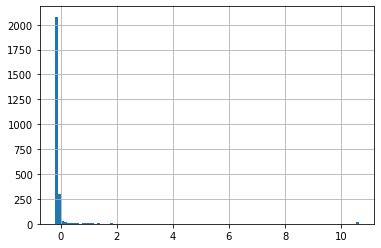

In [106]:
dbe['pause_time_log'].hist(bins=100)

In [81]:
dbe['pause_time_log'].iloc[:1000][0]

-0.20884520003322884

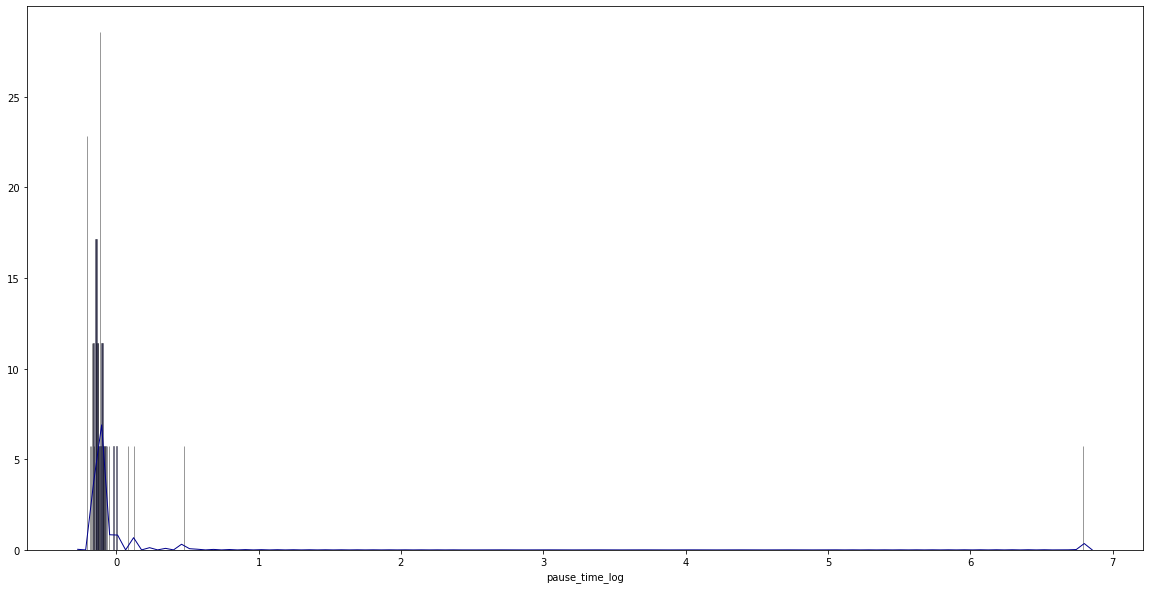

In [45]:
# Density Plot and Histogram of all arrival delays
fig1 = plt.figure(figsize= (20, 10))  # (w, h) (가로, 세로)

sns.distplot(dbe['pause_time_log'].iloc[:50], hist=True, kde=True,
             bins=int(2000), color = 'darkblue', 
             hist_kws={'edgecolor':'black', 'linewidth': 1},
             kde_kws={'linewidth': 1})

In [17]:
sns.distplot?

In [113]:
sns.distplot?

In [107]:
hist

In [119]:
x=dbe.press_time.tolist()
y=dbe.pause_time_log.tolist()

In [ ]:
pt_list=dbe.press_time.tolist()
pt_list_2=[x - pt_list[0] for x in pt_list]

In [90]:
del pt_list_2[0]

In [92]:
pt_list_3=[x - pt_list_2[0] for x in pt_list_2]

In [95]:
del y[0]

In [1]:
#help(plt.figure)
fig2 = plt.figure(figsize= (12, 12))  # (w, h) (가로, 세로)
chart = fig2.add_subplot(1,1,1)


#data1 = np.random.randn(50)
#data2 = np.random.randn(50).cumsum()  # cumsum() : Cumulative Sum 누적합

plt.scatter(np.array(x), np.array(y), color='r')  # 계단형 그래프 # label='step',#drawstyle='steps-post'
#chart.plot(data2, color='b', label='line')  # 선 그래프
# chart라는 같은 차트 공간에 두 데이터를 집어 넣음 -> 같이 나타남

# 차트 구성요소 추가
#plt.title("계단형과 선 그래프") # 제목
plt.xlabel("time(s)") # x축 이름
plt.ylabel("source") # y축 이름
plt.legend(loc='best') # 범례

NameError: name 'plt' is not defined